# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
units = "metric"
url =f"https://api.openweathermap.org/data/2.5/weather?&units={units}&appid={weather_api_key}"
#url =f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
#print("Beginning Data Retrieval     ")
#print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"&q="+ city


    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
    # Parse the JSON and retrieve data
        city_weather_json = requests.get(city_url).json()
     

    # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat= city_weather_json["coord"]["lat"]
        city_lng= city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country =city_weather_json["sys"] ["country"]
        city_date = city_weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                          })

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

#Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | bubaque
Processing Record 2 of Set 1 | mirnyy
Processing Record 3 of Set 1 | san juan
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | saipan
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | papatowai
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | west island
Processing Record 11 of Set 1 | bardai
Processing Record 12 of Set 1 | laiyang
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | atafu village
Processing Record 15 of Set 1 | newnham
Processing Record 16 of Set 1 | bagepalli
Processing Record 17 of Set 1 | tayu
Processing Record 18 of Set 1 | prince rupert
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | kosong
Processing Record 21 of Set 1 | tazovsky
Processing Record 22 of Set 1 | grytviken
Processing Record 23 of Set 1 | puerto natales
Processing Record 24 of Set 1 | tumkur

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

In [8]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bubaque,11.2833,-15.8333,27.24,77,100,6.84,GW,1720059180
1,mirnyy,62.5353,113.9611,17.88,42,95,3.18,RU,1720059182
2,san juan,-31.5375,-68.5364,9.82,34,21,2.47,AR,1720059183
3,puerto ayora,-0.7393,-90.3518,21.42,96,57,2.97,EC,1720059185
4,saipan,15.1355,145.7010,32.39,66,40,6.69,MP,1720059186
...,...,...,...,...,...,...,...,...,...
556,tanumah,27.1000,44.1333,27.73,16,0,3.72,SA,1720060117
557,soio,-6.1349,12.3689,22.17,82,95,2.70,AO,1720060118
558,bodo,67.2800,14.4050,10.99,92,75,1.54,NO,1720060120
559,kalmunai,7.4167,81.8167,27.50,80,96,3.62,LK,1720060121


In [9]:
# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bubaque,11.2833,-15.8333,27.24,77,100,6.84,GW,1720059180
1,mirnyy,62.5353,113.9611,17.88,42,95,3.18,RU,1720059182
2,san juan,-31.5375,-68.5364,9.82,34,21,2.47,AR,1720059183
3,puerto ayora,-0.7393,-90.3518,21.42,96,57,2.97,EC,1720059185
4,saipan,15.1355,145.7010,32.39,66,40,6.69,MP,1720059186


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bubaque,11.2833,-15.8333,27.24,77,100,6.84,GW,1720059180
1,mirnyy,62.5353,113.9611,17.88,42,95,3.18,RU,1720059182
2,san juan,-31.5375,-68.5364,9.82,34,21,2.47,AR,1720059183
3,puerto ayora,-0.7393,-90.3518,21.42,96,57,2.97,EC,1720059185
4,saipan,15.1355,145.7010,32.39,66,40,6.69,MP,1720059186


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

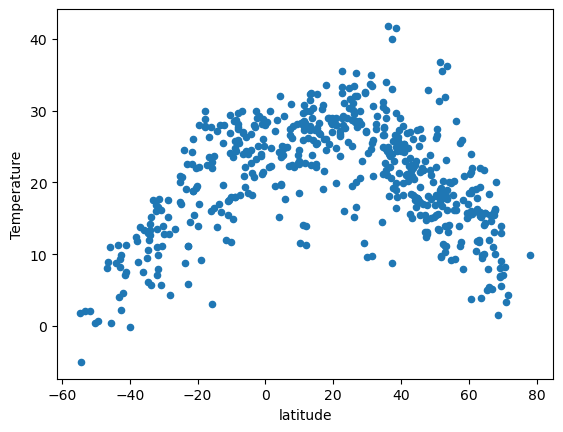

In [14]:

# Incorporate the other graph properties
# YOUR CODE HERE
lat_tem_df_t=pd.DataFrame({
    "Latitude": city_data_df["Lat"],
    "Temperature":city_data_df["Max Temp"]
})
lat_tem_df_chart= lat_tem_df_t.plot(x="Latitude", y="Temperature", kind="scatter")
lat_tem_df_chart.set_xlabel("latitude")
lat_tem_df_chart.set_ylabel("Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

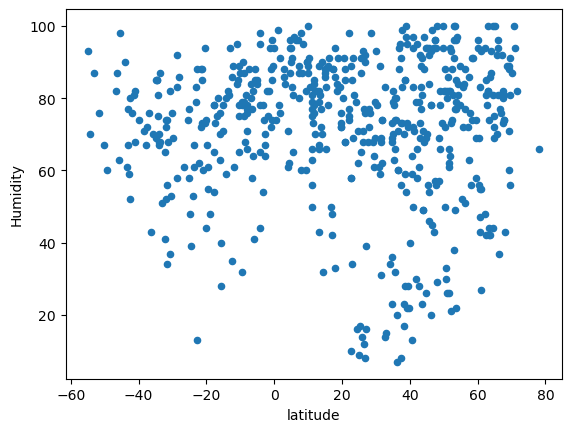

In [13]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
lat_tem_df_h=pd.DataFrame({
    "Latitude": city_data_df["Lat"],
    "Humidity":city_data_df["Humidity"]
})
# Incorporate the other graph properties
# YOUR CODE HERE
lat_tem_df_h_chart= lat_tem_df_h.plot(x="Latitude", y="Humidity", kind="scatter")
lat_tem_df_h_chart.set_xlabel("latitude")
lat_tem_df_h_chart.set_ylabel("Humidity")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

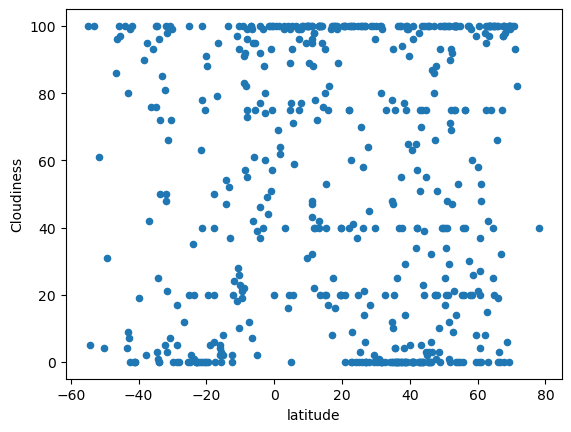

In [15]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
lat_tem_df_c=pd.DataFrame({
    "Latitude": city_data_df["Lat"],
    "Cloudiness":city_data_df["Cloudiness"]
})

# Incorporate the other graph properties
# YOUR CODE HERE
lat_tem_df_c_chart= lat_tem_df_c.plot(x="Latitude", y="Cloudiness", kind="scatter")
lat_tem_df_c_chart.set_xlabel("latitude")
lat_tem_df_c_chart.set_ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

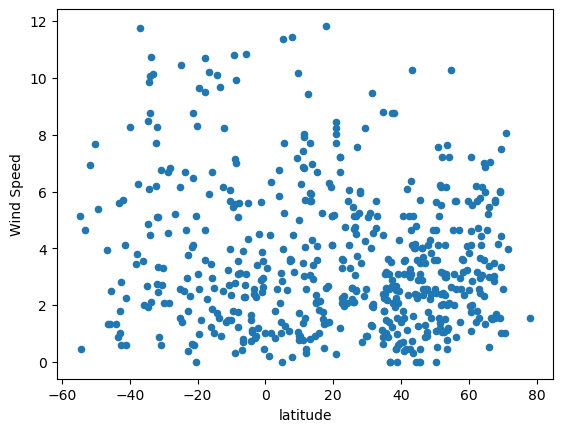

In [16]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
lat_tem_df_w=pd.DataFrame({
    "Latitude": city_data_df["Lat"],
    "Wind Speed":city_data_df["Wind Speed"]
})

# Incorporate the other graph properties

lat_tem_df_w_chart= lat_tem_df_w.plot(x="Latitude", y="Wind Speed", kind="scatter")
lat_tem_df_w_chart.set_xlabel("latitude")
lat_tem_df_w_chart.set_ylabel("Wind Speed")
plt.locator_params(axis="x", nbins=10)
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [51]:
northern_hemi_lat = lat_tem_df_t.loc[(lat_tem_df_t["Latitude"]>= 0)]
northern_hemi_t=pd.DataFrame({
    "Latitude": northern_hemi_lat["Latitude"],
    "Temperature":northern_hemi_lat["Temperature"]
})
northern_hemi_t

,Latitude,Temperature
City_ID,,
0,11.2833,27.24
1,62.5353,17.88
4,15.1355,32.39
10,11.6500,22.69
11,36.9758,20.67
...,...,...
555,9.8500,22.51
556,27.1000,27.73
558,67.2800,10.99


y = -0.23x +30.38


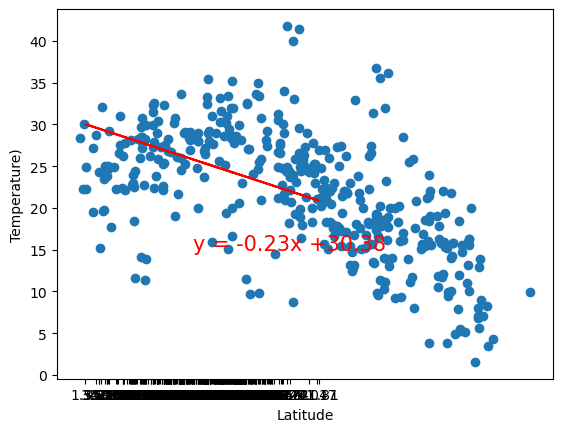

In [58]:
Latitude=northern_hemi_t["Latitude"]
Temperature=northern_hemi_t["Temperature"]
slope, intercept, rvalue, pvalue, stderr = linregress(Latitude, Temperature)
#p_fit = p_slope * Temperature + p_int
line_tem = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_tem)
plt.scatter(Latitude,Temperature)
plt.plot(Temperature,p_fit,"-",color="red")
plt.annotate(line_tem,(20,15),fontsize=15,color="red")
plt.xticks(Temperature)
plt.xlabel('Latitude')
plt.ylabel('Temperature)')
plt.show()


In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_lat = city_data_df_t[(city_data_df["Latitude"] >=0)]

y_values = weather_data['temp']
# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE 

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE